# Step-by-step: How to know your data is “model-ready”

Think in 5 layers. You move to the next layer only if the previous one is clean.

## 1️⃣ Structural sanity (can I trust the table?)
Ask yourself:

Are columns meaningful?
Any duplicate rows?
Any impossible values?

Code

In [1]:
import numpy as np
import pandas as pd


In [2]:
data=pd.read_csv('matches - matches.csv')

In [4]:
data.shape

(636, 18)

In [5]:
data.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [6]:
data.tail(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN
635,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN


In [7]:
data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

# What data.duplicated() actually returns
## data.duplicated() 

This does NOT return data rows.
It returns a boolean Series.

Example:

0    False
1    False
2    True
3    False
4    True
dtype: bool

Meaning:
Row 2 is a duplicate
Row 4 is a duplicate

# Now The magic: .sum()
When you do:
data.duplicated().sum()

#### Pandas does this internally:

##### False → 0
##### False → 0
##### True  → 1
##### False → 0
##### True  → 1
Then:
0 + 0 + 1 + 0 + 1 = 2
#### ✅ Result:
2

## 👉 Number of duplicate rows
Important clarification ❗
You are NOT doing:
data.sum()
You are doing:
(data.duplicated()).sum()
So .sum() is applied to a boolean Series, not to the DataFrame itself.
Why sum() is used instead of something else
Because it is:
Fast
Clean
Readable
Vectorized
### Instead of writing:

count = 0
for x in data.duplicated():
    if x == True:
        count += 1
### You write:
data.duplicated().sum()
🔥 One line, same result

In [12]:

data.duplicated().sum() #0 so no duplicate


np.int64(0)

In [ ]:
data = data.drop_duplicates() #if there was any dyplicate

In [13]:
data.isna().sum() # “How many rows satisfy this condition?”

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [15]:
(data['city'] == 'Delhi').sum() #“How many rows satisfy this condition?”

np.int64(60)

## A/B testing example

In [19]:
(data['winner'] == 'Mumbai Indians').sum() #“How many users are in treatment?”


np.int64(92)

### In Pandas:
### “Count = sum of True values”

Whenever you see:
something.sum()
Ask:
“Is something boolean?”
If yes → you’re counting

### What does data.isna() mean?
isna() = “is this value missing?”

It checks every single cell in your dataset and returns True or False.

In [20]:
data.isna().sum() # Player of the match   Umpire Two things one one or three it means they have null values feel the nan value we will perform some operations

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

# In the winner column, 3 rows have NaN (missing value)

## Example:
###### Match 125 → no result
###### Match 347 → abandoned
###### Match 502 → rain

### Is this GOOD or BAD?
Depends on the column and your goal.
Case A: Missing values in winner (IPL case)
Why it happens
Match abandoned
No result
Rain

## Decision options
#### Option 1: Keep them (common)
##### data['winner'] = data['winner'].fillna('no result')

#### Option 2: Drop them (for ML)
##### data = data.dropna(subset=['winner'])
# When to drop?
##### When winner is your target variable

In [21]:
data = data.dropna(subset=['winner']) #“Delete all rows where the winner column has a missing value (NaN).”
                                      # perform this operation only when you need to work in the winter part 
                                         #and You cannot train or evaluate without it


## One-line mental model (remember this 🧠)

#### dropna(subset=[X]) = “Remove rows where X is missing.”
basically
##### dropna(subset = [The row or column you want to remove]) 

<Axes: >

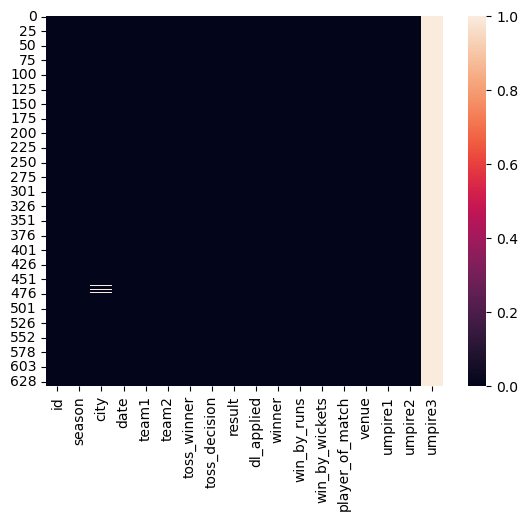

In [24]:
import seaborn as sns
sns.heatmap(data.isna(), cbar=True)


## 3️⃣ Data type correctness (silent killer)

In [25]:
data.dtypes

id                   int64
season               int64
city                object
date                object
team1               object
team2               object
toss_winner         object
toss_decision       object
result              object
dl_applied           int64
winner              object
win_by_runs          int64
win_by_wickets       int64
player_of_match     object
venue               object
umpire1             object
umpire2             object
umpire3            float64
dtype: object

## INFO:
| Column   | Wrong  | Correct   |
| -------- | ------ | --------- |
| date     | object | datetime  |
| category | object | category  |
| numeric  | object | int/float |
### If dtypes are wrong → model results will be wrong

In [26]:
data['date'] = pd.to_datetime(data['date'])
data['city'] = data['city'].astype('category')


C:\Users\debop\AppData\Local\Temp\ipykernel_11168\988889592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date'])
C:\Users\debop\AppData\Local\Temp\ipykernel_11168\988889592.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['city'] = data['city'].astype('category')


In [27]:
data = data.copy()
data.loc[:, 'date'] = pd.to_datetime(data['date'])    # like this you can change the type
data.loc[:, 'city'] = data['city'].astype('category')


In [28]:
data.dtypes

id                          int64
season                      int64
city                     category
date               datetime64[ns]
team1                      object
team2                      object
toss_winner                object
toss_decision              object
result                     object
dl_applied                  int64
winner                     object
win_by_runs                 int64
win_by_wickets              int64
player_of_match            object
venue                      object
umpire1                    object
umpire2                    object
umpire3                   float64
dtype: object

In [29]:
data['winner'].value_counts()
data['city'].unique()


['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', ..., 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', NaN]
Length: 31
Categories (30, object): ['Abu Dhabi', 'Ahmedabad', 'Bangalore', 'Bloemfontein', ..., 'Rajkot', 'Ranchi', 'Sharjah', 'Visakhapatnam']

In [30]:
data.describe()


,id,season,date,dl_applied,win_by_runs,win_by_wickets,umpire3
count,633.000000,633.000000,633,633.000000,633.000000,633.000000,0.0
mean,317.769352,2012.484992,2012-10-22 18:32:25.023696640,0.025276,13.747235,3.388626,NaN
min,1.000000,2008.000000,2008-04-18 00:00:00,0.000000,0.000000,0.000000,NaN
25%,159.000000,2010.000000,2010-04-11 00:00:00,0.000000,0.000000,0.000000,NaN
50%,318.000000,2012.000000,2012-05-20 00:00:00,0.000000,0.000000,4.000000,NaN
75%,476.000000,2015.000000,2015-04-21 00:00:00,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,2017-05-21 00:00:00,1.000000,146.000000,10.000000,NaN
std,183.677614,2.775374,NaN,0.157088,23.946920,3.420526,NaN


In [32]:
data['win_by_runs'].mask(data['win_by_runs'] < 0)


0      35
1       0
2       0
3       0
4      15
       ..
631     0
632     0
633    22
634     0
635     8
Name: win_by_runs, Length: 633, dtype: int64